# **Project Name**    - **AirBnb Bookings Analysis**

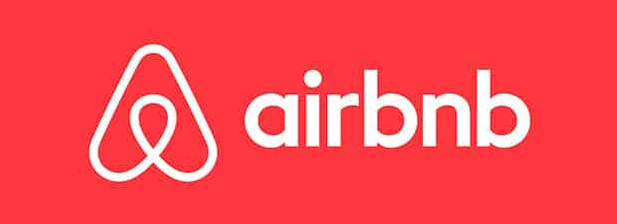





##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**   Chetan Tiwari
##### **Team Member 2 -**   NA
##### **Team Member 3 -**   NA
##### **Team Member 4 -**   NA

# **Project Summary -**

**Introduction**  
Airbnb has transformed the travel industry, offering millions of listings worldwide. This project analyzes a dataset of 49,000 listings to extract key insights, focusing on user behavior, pricing, and host performance.

**Objective**  
The goal is to identify trends and patterns in Airbnb listings to inform business strategies, enhance user experience, and optimize pricing.

**Data Overview**  
The dataset includes both categorical (property type, neighborhood) and numeric variables (prices, reviews), offering a snapshot of Airbnb’s global presence.

**Analysis Approach**  
1. **Data Cleaning**: Handle missing values, outliers, and standardize formats.
2. **Exploratory Data Analysis (EDA)**:
   - Examine statistics, distributions, and categorical frequencies.
3. **Trends and Patterns**:
   - Analyze pricing, host performance, and customer preferences.
4. **Predictive Modeling (Optional)**:
   - Predict prices and forecast demand.

**Findings and Recommendations**  
Key insights will guide pricing strategies, host improvements, and market expansion recommendations.

**Conclusion**  
This analysis offers valuable insights to optimize Airbnb's offerings, improve host performance, and support strategic decision-making.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**




The goal is to analyze Airbnb's dataset to uncover key patterns that inform strategic decisions. The focus areas are:

1. **Key Pricing Factors**: Identify how property type, location, and amenities affect prices and optimize revenue.
2. **Host Performance**: Evaluate host ratings, response times, and listings to support or improve performance.
3. **Customer Preferences**: Analyze booking patterns to understand user satisfaction and property popularity.
4. **Predictive Models** (Optional): Forecast pricing and demand trends for strategic planning.

The analysis will offer actionable recommendations to improve service, host performance, and pricing strategies.

### **Define Your Business Objective?**


This project aims to use Airbnb's listing data to enhance decision-making and operational efficiency by:

1. **Optimizing Pricing**: Recommend data-driven pricing strategies based on property type, location, and amenities to maximize host revenue.
2. **Improving Host Performance**: Provide insights to enhance host ratings, response times, and service quality.
3. **Understanding Customer Preferences**: Analyze booking patterns to tailor offerings and marketing strategies.
4. **Forecasting Trends**: Build models to predict pricing and demand for strategic planning.

The goal is to boost Airbnb’s competitiveness, revenue, user satisfaction, and market growth.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Number of  rows in dataset are: {df.shape[0]}')
print(f'Number of  columns in dataset are: {df.shape[1]}')

### Dataset Information

In [ ]:
# Dataset Info
df.info()

Last review datatype is object, it needs to be changed as date

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'Number of duplicate enteried in the dataset are: {df.duplicated().sum()}')

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(f'Number of missing or null enteries are: {df.isnull().sum()}')

In [ ]:
# Visualizing the missing values
null_data = round((df.isnull().sum()/len(df))*100, 2)     # creating percentage of null values column whise
null_df = pd.DataFrame(null_data, columns=['Missing Percentage'])

# Reset the index to use the column names as a regular column
null_df = null_df.reset_index().rename(columns={'index': 'Column'})
null_df

### Findings

From the analysis of missing values in the dataset, it is evident that:

- **'last_review'**: This column has over 20% missing values.
- **'reviews_per_month'**: This column also has over 20% missing values.
- **'name', 'host_name'**: These columns have missing values but less than 1%.

We need to handle the missing values

### What did you know about your dataset?

### Dataset Overview

- **Size**: ~49,000 rows, 16 columns.
- **Data Types**: Mix of categorical and numeric.
- **Key Columns**: 'last_review' and 'reviews_per_month' have over 20% missing values.

### Insights & Considerations

- **Missing Values**: Significant missing data in key columns requires careful handling.
- **Analysis Focus**: Explore pricing, host performance, customer preferences, and geographical trends.
- **Approach**:
  1. Clean data and address missing values.
  2. Perform EDA with statistics and visualizations.
  3. Consider predictive modeling for pricing and demand analysis.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f'Columns in dataset are\n: {df.columns}')

In [ ]:
# Dataset Describe

numeric_summary = df.describe(include = ['int64', 'float64'])
categorical_summary = df.describe(include = ['object'])

numeric_summary

In [ ]:
categorical_summary

### Variables Description

1. Price: Upon analyzing the `price` column in the Airbnb dataset using `df.describe()`, it was observed that the minimum value is `0`. This is not a plausible value for a rental price, indicating potential issues with the data. These zero values might result from unupdated data entries or listings where the hosts have stopped renting their properties. To ensure the accuracy of our analysis, it is essential to remove these records with a `price` of `0`.

2. Name: There are many unique property names, with "Hillside Hotel" being the most frequent.

3. Host Name: The dataset has many unique host names, with "Michael" being the most frequently occurring name.

4. Neighbourhood Group: This column has 5 unique neighbourhood groups, with "Manhattan" being the most common.

5. Neighbourhood: There are 221 unique neighbourhoods, with "Williamsburg" being the most frequent.

6. Room Type: There are 3 types of rooms, with "Entire home/apt" being the most prevalent.

7. Last Review: This column has many unique dates, with "2019-06-23" being the most frequently recorded review date.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

categorical_variable = df[['room_type', 'neighbourhood_group', 'host_name', 'name', 'neighbourhood']]

for i in categorical_variable:
  print(f"Unique values in column: [{i}] are\n {df[i].unique()}")
  print('-'*100)
  print('\n')


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Neglecting the data with price = 0
df = df[df['price'] > 0]

Therefore 11 data been removed from dataset where price was = 0

In [ ]:
# in order to fill missing values firstly we need to check whether the data follows a Normal distribution or it is Skewed

# Select the columns with missing values
missing_values = df[['last_review', 'reviews_per_month', 'name', 'host_name']]

for i in missing_values:
    if df[i].dtype != 'object':  # Check if the column is numeric
        skewness = df[i].skew()
        print(f'Skewness of {i} is: {skewness:.2f}')
    else:
        print(f'Skewness of {i} is not applicable (non-numeric column).')

In [ ]:
# Imputing the numerical column with skewed data ----------------------> median
# Imputing the non-numerical columns with -----------------------------> mode

from sklearn.impute  import SimpleImputer
impute_median = SimpleImputer(strategy = 'median')
impute_mode = SimpleImputer(strategy = 'most_frequent')

df[['reviews_per_month']] = impute_median.fit_transform(df[['reviews_per_month']])
df[['last_review', 'name', 'host_name']] = impute_mode.fit_transform(df[['last_review', 'name', 'host_name']])

In [ ]:
# changing 'Last_review' datatype ftom object to date

df['last_review'] = pd.to_datetime(df['last_review'])

### What all manipulations have you done and insights you found?

1. **Filtering out 0s in Price column**

 - Upon discovering that the `price` column had a minimum value of `0`, which is not plausible for rental prices, I applied a filter to remove these entries. The filter `df[df['price'] > 0]` was used to exclude records where the price was `0`, ensuring the dataset reflects only valid, active listings.


2. **Imputation of Missing Values:**
   - For numeric columns with skewed distributions, such as `reviews_per_month`, missing values were imputed using the median. This approach helps address skewness and provides a central measure of the data.
   - For categorical columns (`last_review`, `name`, `host_name`), missing values were imputed using the mode. This strategy replaces missing values with the most frequently occurring value in each column, ensuring a common value is used to fill gaps.

3. **Datatype Conversion:**
   - The `last_review` column, initially of type `object`, was converted to `datetime`. This conversion allows for more accurate date-based operations and analysis, such as time series analysis or date comparisons.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Univariate Analysis

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
f, ax = plt.subplots(figsize =(8, 6))

plt.subplot(2,3,1)
sns.boxplot(df['price'])

plt.subplot(2,3,2)
sns.boxplot(df['minimum_nights'])

plt.subplot(2,3,3)
sns.boxplot(df['number_of_reviews'])

plt.subplot(2,3,4)
sns.boxplot(df['reviews_per_month'])

plt.subplot(2,3,5)
sns.boxplot(df['calculated_host_listings_count'])

plt.subplot(2,3,6)
sns.boxplot(df['availability_365'])

plt.tight_layout()
plt.show()

In [ ]:
# Log transformation of variables
# Chart - 1.1 visualization code
f, ax = plt.subplots(figsize =(8, 6))

plt.subplot(2,3,1)
sns.boxplot(np.log10(df['price']))

plt.subplot(2,3,2)
sns.boxplot(np.log10(df['minimum_nights']))

plt.subplot(2,3,3)
sns.boxplot(np.log10(df['number_of_reviews']))

plt.subplot(2,3,4)
sns.boxplot(np.log10(df['reviews_per_month']))

plt.subplot(2,3,5)
sns.boxplot(np.log10(df['calculated_host_listings_count']))

plt.subplot(2,3,6)
sns.boxplot(np.log10(df['availability_365']))

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?





The initial boxplot was created to visualize the distribution of the selected numeric variables (`price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`). Boxplots are ideal for identifying outliers and understanding the spread and central tendency of the data.

##### 2. What is/are the insight(s) found from the chart?



1. **Low Reviews per Month:** The reviews per month for each host are generally very low, indicating either a low engagement from guests or a potentially small number of bookings.
  
2. **Median Availability:** The median value for `availability_365` is around 50, suggesting that many properties are only available for about 50 days a year. This could imply that a significant portion of hosts are not full-time renters.

3. **Price Outliers:** The `price` column contains many outliers, which could indicate a wide range of pricing strategies among hosts or the presence of extremely high-priced listings that may distort the overall data analysis.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



1. **Low Reviews per Month**:  
   - **Opportunity**: Encourage guest reviews through follow-ups or incentives to boost engagement.
   - **Impact**: More reviews enhance credibility, driving bookings and revenue growth.

2. **Median Availability (50 Days)**:  
   - **Opportunity**: Encourage hosts to increase availability with targeted campaigns.
   - **Impact**: More availability leads to increased bookings and revenue.

3. **Price Outliers**:  
   - **Opportunity**: Offer pricing tools to help hosts set competitive rates.
   - **Impact**: Optimized pricing boosts occupancy and revenue for hosts and Airbnb.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
f, ax = plt.subplots(figsize =(12, 10), nrows=2, ncols=3)

plt.subplot(2,3,1)
sns.histplot(df['price'], kde = True, bins = 10, ax=ax[0, 0])

plt.subplot(2,3,2)
sns.histplot(df['minimum_nights'], kde = True, bins = 10, ax=ax[0, 1])

plt.subplot(2,3,3)
sns.histplot(df['number_of_reviews'], kde = True, bins = 10, ax=ax[0, 2])

plt.subplot(2,3,4)
sns.histplot(df['reviews_per_month'], kde = True, bins = 10, ax=ax[1, 0])

plt.subplot(2,3,5)
sns.histplot(df['calculated_host_listings_count'], kde = True, bins = 10, ax=ax[1, 1])

plt.subplot(2,3,6)
sns.histplot(df['availability_365'], kde = True, bins = 10, ax=ax[1, 2])

plt.tight_layout()
plt.show()

We cannot visualise anything from above data so using log transformation

In [ ]:
# Chart - 2 visualization code
f, ax = plt.subplots(figsize =(12, 10), nrows=2, ncols=3)

plt.subplot(2,3,1)
sns.histplot(np.log10(df['price']), kde = True, bins = 10, ax=ax[0, 0])

plt.subplot(2,3,2)
sns.histplot(np.log10(df['minimum_nights']), kde = True, bins = 10, ax=ax[0, 1])

plt.subplot(2,3,3)
sns.histplot(np.log10(df['number_of_reviews']), kde = True, bins = 10, ax=ax[0, 2])

plt.subplot(2,3,4)
sns.histplot(np.log10(df['reviews_per_month']), kde = True, bins = 10, ax=ax[1, 0])

plt.subplot(2,3,5)
sns.histplot(np.log10(df['calculated_host_listings_count']), kde = True, bins = 10, ax=ax[1, 1])

plt.subplot(2,3,6)
sns.histplot(np.log10(df['availability_365']), kde = True, bins = 10, ax=ax[1, 2])

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is used to visualize the distribution of a single numerical variable by showing the frequency of data points within specified bins. It is particularly useful for understanding the distribution of the data, including its shape (e.g., normal distribution), central tendency, and spread. In this case, the histogram helps in assessing how frequently different values occur and whether the data follows a normal distribution or exhibits skewness. This insight is valuable for making decisions about data transformation and understanding the underlying patterns in your dataset.

##### 2. What is/are the insight(s) found from the chart?

All the variables in the dataset exhibit skewness, suggesting that they have very large amount of outliers.

## Bivariate Analysis

#### Chart - 3

In [ ]:
a = df.groupby('neighbourhood_group').count().reset_index()

In [ ]:
# Chart - 3 visualization code
sns.barplot(x = a['neighbourhood_group'], y = a['id'], color = 'red')
plt.xlabel('neighbourhood group')
plt.ylabel('count of neighbourhood group')
plt.title('Distribution of Listings Across Neighbourhood Groups')
plt.show()

##### 1. Why did you pick the specific chart?

This bar plot was specifically chosen to highlight the distribution of Airbnb listings across different neighborhood groups. By visualizing the number of listings in each group, we can quickly identify which neighborhoods have a high concentration of listings and which ones have fewer. This helps in understanding the popularity or saturation of listings in various areas, providing insights that are crucial for market analysis and decision-making.

##### 2. What is/are the insight(s) found from the chart?

The bar plot reveals that Manhattan and Brooklyn dominate the Airbnb market with over 20,000 listings each, making them the most popular neighborhoods for hosts. In contrast, Queens has a moderate number of listings, with around 5,500, while the Bronx and Staten Island are the least popular, with approximately 1,000 and 300 listings, respectively. These insights suggest that hosts and travelers alike favor certain neighborhoods, with Manhattan and Brooklyn being the clear leaders in terms of Airbnb presence.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

The gained insights can indeed contribute to a positive business impact. Understanding that Manhattan and Brooklyn have the highest number of Airbnb listings can help property owners, hosts, and businesses make informed decisions about where to invest or expand their operations. By focusing on these high-demand areas, businesses can target a larger market and potentially increase their revenue. Additionally, marketing strategies can be tailored to attract more guests to these popular neighborhoods, further boosting business opportunities.

Potential Insights Leading to Negative Growth:

The insights also indicate that the Bronx and Staten Island have significantly fewer listings compared to other neighborhoods, with only about 1,000 and 300 listings, respectively. This could signal a lack of demand in these areas, potentially leading to negative growth if resources are invested here without proper market research. The lower number of listings might be due to factors such as lower tourist interest, less desirable locations, or inadequate infrastructure. Investing in these areas without addressing these underlying issues could result in poor returns and business stagnation.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
sns.barplot(x = df['room_type'], y = df['price'], color = 'red')
plt.title('Room type vs. Price graph')
plt.show()

##### 1. Why did you pick the specific chart?

I chose the bar plot between room type and price to effectively showcase the price ranges of different room types available on Airbnb. This visualization allows for a clear comparison of how prices vary across various room categories, such as entire homes, private rooms, and shared spaces. By using this chart, we can easily identify which room types command higher prices and which ones are more budget-friendly, providing valuable insights into pricing trends across different accommodation options

##### 2. What is/are the insight(s) found from the chart?


The bar plot reveals that the average price of private rooms and shared rooms hovers around Dollar 100, making them more budget-friendly options for travelers. In contrast, the average price for an entire home or apartment is significantly higher, at around Dollar 200. This indicates that entire homes or apartments are priced at a premium compared to other room types, likely due to the added privacy and space they offer.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



The insights gained from the chart can lead to a positive business impact by informing pricing strategies and market positioning. Knowing that private rooms and shared rooms are generally priced around Dollar 100, businesses can target budget-conscious travelers by offering competitive rates or value-added services within this price range. On the other hand, recognizing that entire homes or apartments are priced higher, around Dollar 200, allows hosts and property managers to cater to travelers seeking more privacy and space. By adjusting pricing and marketing strategies accordingly, businesses can better meet the needs of different customer segments, thereby increasing occupancy rates and profitability.



#### Chart - 5

In [ ]:
# Chart - 5 visualization code
sns.barplot(y = df['number_of_reviews'], x = df['room_type'], color = 'red')
plt.title('Room type vs No. of reviews Graph')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot was chosen to compare the number of reviews across different room types. This type of chart is effective for visualizing categorical data, as it allows for straightforward comparisons between distinct categories—in this case, the different room types. By displaying the number of reviews for each room type as bars, the chart clearly illustrates how review counts vary among the various types of accommodations. This comparison helps in understanding which room types are more frequently reviewed, potentially reflecting their popularity or the level of guest engagement.

##### 2. What is/are the insight(s) found from the chart?

The bar plot indicates that:

- Private Rooms: These have the highest number of reviews compared to other room types. This suggests that private rooms are the most popular or frequently booked type of accommodation, possibly due to their balance of cost and privacy.

- Entire Home/Apartment: This room type follows, with a significant number of reviews. The higher review count for entire homes/apartments indicates that they are also popular, likely among guests seeking more space and privacy for longer stays.

- Shared Rooms: These have the fewest reviews among the three categories. The lower number of reviews could reflect less popularity or a different market segment, such as budget travelers who prefer shared accommodations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Understanding Popularity: Knowing that private rooms receive the highest number of reviews can guide business strategies to focus more on this room type. This could include increasing the availability of private rooms, optimizing pricing strategies, or enhancing amenities to attract more guests.

- Targeted Marketing: The popularity of entire homes/apartments suggests a potential market for guests seeking more space. Marketing campaigns or promotions can be tailored to highlight the benefits of entire homes/apartments, potentially boosting bookings in this category.

- Improving Shared Rooms: Although shared rooms have fewer reviews, this presents an opportunity. By analyzing why shared rooms are less popular, businesses can make improvements or adjustments, such as offering better amenities or revising pricing strategies to attract more guests.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
sns.scatterplot(x = df['price'], y = df['availability_365'], hue = df['neighbourhood_group'])
plt.title('Price vs availability_365 graph')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen to analyze the relationship between price and availability_365 for listings. Scatter plots are particularly effective for identifying potential correlations between two numerical variables.

##### 2. What is/are the insight(s) found from the chart?

No significant correlation exists between both varibles. Additionally, the scatter plot reveals that Manhattan has the highest number of available days

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With Manhattan having the highest number of available days, businesses could consider focusing marketing efforts or adjusting strategies for this area.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
sns.scatterplot(x = df['price'], y = df['number_of_reviews'], hue = df['room_type'])
plt.title('Price vs number of reviews plot')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen to analyze the relationship between price and number_of_reviews. This chart is ideal for examining how changes in price might correlate with the number of reviews a listing receives.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows no clear correlation between the price of a listing and the number_of_reviews it receives. "Entire Home/Apartment" appear to receive the largest number of reviews. This indicates that guests are more inclined to book and review entire homes or apartments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that entire homes and apartments receive the largest number of reviews suggests a strong preference among guests for this type of accommodation. This can inform business strategies to increase the availability or improve the quality of entire home/apartment listings. By catering to this demand, businesses can enhance guest satisfaction and potentially increase bookings.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
b = df.sort_values('price', ascending = False)[['host_name', 'price']].reset_index().head(10)
plt.figure(figsize=(15, 4))
sns.barplot(x = b['host_name'], y = b['price'], color = 'red')
plt.title('Top 10 Host charging highest price')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot was chosen to visualize the top 10 hosts charging the highest prices. Bar plots are particularly effective for comparing the prices charged by different hosts because they provide a clear and straightforward way to rank and display the relative values across categories.

##### 2. What is/are the insight(s) found from the chart?

Top High-Priced Hosts: The chart reveals that hosts such as Jelena, Erin, Kathrine, Amy, and Matt Olson charge in the highest price range, approximately around $10,000. This indicates that these hosts are positioned at the premium end of the market, potentially offering high-end or luxury accommodations.

Secondary High-Priced Group: Hosts like Rum, Jessica, Sally, and Jack charge in the $8,000 range. While slightly lower than the top group, these hosts also command high prices, suggesting that they are positioned as high-value options within the market.

Price Range Segmentation: The distinct price ranges help categorize hosts based on their pricing strategies. The clear separation between the top group (10,000 range) and the secondary group ($8,000 range) suggests different tiers of high-end offerings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights reveal which hosts are positioned at the top end of the price range. This can help other businesses or hosts understand the market for high-end accommodations and potentially develop strategies to compete or differentiate themselves in the premium segment.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
c = df.groupby(['host_id', 'host_name'])['number_of_reviews'].max().reset_index()
c = c.sort_values('number_of_reviews', ascending = False).head(10)
plt.figure(figsize=(15, 4))
sns.barplot(x = c['host_name'], y = c['number_of_reviews'], color = 'red')
plt.title('Top 10 busiest hosts in terms of no. of reviews')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot was chosen to visualize the top 10 busiest hosts in terms of the number of reviews. Bar plots are particularly effective for ranking and comparing categories, making them ideal for highlighting the hosts who have received the most guest reviews

##### 2. What is/are the insight(s) found from the chart?

The bar plot reveals that Dona is the busiest host, with the highest number of reviews. This suggests that Dona's listings are very popular among guests, possibly due to factors like exceptional service, desirable locations, or competitive pricing. Angela completes the list of the top 10 busiest hosts. While still within the top ranks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the bar plot identifying the top 10 busiest hosts can help businesses initiate targeted loyalty programs. By encouraging repeat bookings with these highly-reviewed hosts, businesses can strengthen customer relationships, increase guest satisfaction, and boost overall booking rates. For instance, offering discounts or special perks for returning guests could drive more bookings for these popular hosts, enhancing their revenue and guest engagement.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
d = df.groupby('room_type')['minimum_nights'].mean().reset_index()
d = d.sort_values('minimum_nights', ascending = False)
sns.barplot(x = d['room_type'], y = d['minimum_nights'], color = 'red')
plt.title('Distribution of Minimum Nights by Room Type')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot was chosen to compare minimum_nights across different room_type categories. Bar plots are effective for displaying and comparing categorical data, making them ideal for visualizing how the required minimum stay varies between different types of accommodations.

##### 2. What is/are the insight(s) found from the chart?

- Entire Home/Apartment: The bar plot shows that listings categorized as "Entire Home/Apartment" have the highest avg number of minimum nights, with more than 8 minimum. This suggests that this room type is often associated with longer minimum stay requirements, making it a preferred choice for guests.

- Shared Room: comes in the second place with minimum nights as 6 which reveals suitability for the budget friendly travellers

- Private Room: comes to the last position with avg. 5

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Understanding that "Entire Home/Apartment" listings tend to have higher minimum night requirements can help businesses target marketing efforts toward travelers looking for longer stays, such as families or business travelers. Offering discounts or special deals for extended stays could attract more bookings in this category, leading to increased occupancy and revenue.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
e = df.groupby('neighbourhood_group')['price'].mean().reset_index()
e = e.sort_values('price', ascending = False)
sns.barplot(x = e['neighbourhood_group'], y = e['price'], color = 'red')
plt.title('Average Price by Neighbourhood Group')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot was chosen to compare the average price of listings across different neighbourhood_group categories. Bar plots are particularly effective for illustrating differences in categorical data, making them ideal for visualizing how average prices vary across different neighborhoods.

##### 2. What is/are the insight(s) found from the chart?

 - The bar plot reveals that Manhattan has the highest average price, around $200. This indicates that listings in Manhattan are generally more expensive compared to other neighborhoods, which could be attributed to the area’s high demand, prime location, and premium amenities.

 - the average prices in Brooklyn, Staten Island, Queens, and the Bronx are relatively similar and fall within a lower price range compared to Manhattan. This suggests that these neighborhoods are more affordable for guests, which might be due to lower demand, different property types, or varying local market conditions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding that Manhattan has the highest average price can help businesses tailor their pricing strategies to maximize revenue. For listings in Manhattan, businesses might consider premium pricing or upscale offerings to align with the high demand and willingness of guests to pay more in this area. Conversely, for listings in more affordable neighborhoods like Brooklyn or Queens, businesses can adjust pricing to attract price-sensitive travelers, potentially increasing occupancy rates.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
sns.barplot(y = df['number_of_reviews'], x = df['neighbourhood_group'], estimator=sum, color = 'red')
plt.title('Neighbourhood group Vs. No of reviews')
plt.show()

##### 1. Why did you pick the specific chart?

 bar plot was selected to visualize the number of reviews across different neighbourhood_group categories. Bar plots are effective for comparing quantities among discrete categories

##### 2. What is/are the insight(s) found from the chart?

- Brooklyn Leads in Reviews: The bar plot shows that Brooklyn has the highest number of reviews, approximately 500,000. This suggests that Brooklyn is the most popular neighborhood group among guests, potentially due to its diverse attractions, accommodation options, or overall appeal.

- Manhattan Close Behind: Manhattan is just below Brooklyn in terms of the number of reviews. With a significant number of reviews, Manhattan also attracts a high volume of guests, which aligns with its status as a major travel destination.

- Queens with Moderate Reviews: Queens has around 150,000 reviews, indicating a moderate level of guest activity compared to Brooklyn and Manhattan. It is less popular than the top two neighborhoods but still attracts a notable number of visitors.

- Bronx and Staten Island Lowest: The Bronx and Staten Island have the lowest number of reviews, with very few reviews compared to the other neighborhoods. This suggests that these areas may be less frequented by guests, potentially due to fewer attractions, less accessibility, or other factors influencing their popularity.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that Brooklyn and Manhattan have the highest number of reviews can guide targeted marketing efforts. Businesses can focus their promotional activities on these high-traffic areas to attract more guests. For example, special deals or exclusive offers in Brooklyn could capitalize on its popularity and further boost bookings.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
sns.scatterplot(x = df['number_of_reviews'], y = df['reviews_per_month'], hue = df['room_type'])
plt.title('No of review per month vs no of review Hue (room type)')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot with number_of_reviews_per_month versus number_of_reviews and hue representing room_type was selected to examine the relationship between the frequency of reviews and the total number of reviews, while differentiating data by room type.

##### 2. What is/are the insight(s) found from the chart?

Positive Correlation Between Review Metrics: The scatter plot shows a positive relationship between number_of_reviews_per_month and number_of_reviews. This suggests that listings with a higher frequency of reviews per month tend to accumulate more total reviews over time. In other words, properties that receive frequent reviews are likely to have a higher overall review count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 If popular room types (e.g., entire homes/apartments) show lower number_of_reviews_per_month compared to other room types, this might suggest that these properties are not receiving as many reviews on a monthly basis despite being popular.

####Chart - 14

In [ ]:
f = df.groupby('neighbourhood_group')['availability_365'].median().reset_index()            #median used because of skewed data
f = f.sort_values('availability_365', ascending = False)
sns.barplot(x = f['neighbourhood_group'], y = f['availability_365'], color = 'red')
plt.title('Neighbourhood group vs Availability in days')
plt.show()

##### 1. Why did you pick the specific chart?

Barplots are ideal for comparing a categorical variable (neighbourhood_group) against a summary of a numerical variable (availability_365). It visually conveys how availability varies across different neighborhoods.

##### 2. What is/are the insight(s) found from the chart?


Staten Island stands out with over 200 days of availability, indicating that properties in this neighborhood are generally available for booking much longer than in other areas. This could suggest lower demand for short-term rentals, or perhaps hosts keep their properties open for more extended periods.
Moderate Availability in Bronx and Queens:

Bronx and Queens show around 150 days and 100 days of availability, respectively. These neighborhoods may have moderate demand for rentals, with some properties being booked while others remain available for longer periods.
Low Availability in Manhattan and Brooklyn:

Manhattan and Brooklyn both have less than 50 days of availability, which could indicate high demand for short-term rentals. Properties in these areas are likely booked frequently, leading to fewer days of availability throughout the year.

####Chart - 15

In [ ]:
df.columns
x = df.groupby('neighbourhood')['number_of_reviews'].median().reset_index()
x = x.sort_values('number_of_reviews', ascending = False).head(3)
sns.barplot(x = x['neighbourhood'], y = x['number_of_reviews'], color = 'red')
plt.title('Top 3 popular neighbourhood')
plt.show()

##### 1. What is/are the insight(s) found from the chart?

Silver Lake has the highest number of reviews, indicating it is likely the most popular destination among travelers. A high number of reviews often correlates with frequent bookings and interest, suggesting that Allerton might offer features or amenities that attract visitors.

Eltingville and Arden Richmondtown follow Silver Lake in terms of the number of reviews, indicating that these neighborhoods are also frequently visited by travelers. These areas could be emerging destinations or offer a good balance of pricing, location, and services.

####Chart - 16

In [ ]:
df.columns
g = df.groupby('neighbourhood')['price'].median().reset_index()
g = g.sort_values('price', ascending = False).head(10)
plt.figure(figsize= (13, 4))
sns.barplot(x = g['neighbourhood'], y = g['price'], color = 'red')
plt.title('Top 10 neighbourhoods with highest price')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot provides a clear and easy-to-interpret visual comparison of the top 10 neighborhoods with the highest prices. It helps in identifying which areas command the highest rental rates at a glance, offering valuable insights into market segmentation.

##### 2. What is/are the insight(s) found from the chart?

Fort Wadsworth  Has the Highest Rental Prices: With prices around $800, Fort Wadsworth stands out as the most expensive neighborhood. This indicates a premium market with high demand or exclusivity, making it a lucrative area for property owners.

Woodrow Follows: These neighborhoods have rental prices around $700, positioning them as high-end but slightly more affordable options compared to Battery Park City.

####Chart - 17

In [ ]:
df.columns
y = df.groupby('neighbourhood')['minimum_nights'].median().reset_index()
y = y.sort_values('minimum_nights', ascending = False).head(3)
sns.barplot(x = y['neighbourhood'], y = y['minimum_nights'], color = 'red')
plt.title('Top 3 neighbouroods with median miminum nights')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Bay Terrace, State Island has the highest median minimum nights at 16 nights, suggesting that properties in this neighborhood typically require guests to book longer stays. This could indicate either lower demand for short stays or a strategy by hosts to focus on longer-term renters.

####Chart - 18

In [ ]:
df.columns
z = df.groupby('name')['price'].max().reset_index()
plt.figure(figsize = (17, 4))
z = z.sort_values('price', ascending = False).head(5)
plt.title('Top 5 costliest listed properties')
sns.barplot(x = z['name'], y = z['price'], color = 'red')
plt.tight_layout()
plt.show()

##### 1. What is/are the insight(s) found from the chart?

The luxury 1-bedroom apartment with a stunning Manhattan view tops the price list at $10,000. This suggests that premium features, such as an exceptional view and possibly high-end amenities, significantly increase the rental price.

The following properties, including Furnished room in Astoria, 1-bedroom in Lincoln Center, Spanish Harlem apartment, and 2-bedroom in the heart of NYC (Manhattan Lower East Side), all have a rental price of $9,000. These properties are also priced high, indicating that they are in desirable locations or offer desirable features.

#Multivriate Analysis

#### Chart - 19 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
num = df[['price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
sns.heatmap(num.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation graph was chosen for multivariate analysis to examine the relationships between multiple variables simultaneously. Correlation graphs, such as heatmaps of correlation matrices, are useful for identifying how different variables are related to each other, showing both positive and negative correlations.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that reviews_per_month and number_of_reviews are highly positively correlated. This suggests that listings with more reviews per month tend to have a higher total number of reviews, indicating that frequent reviews are associated with overall higher review counts.

All other variables show no significant correlations with each other

#### Chart - 20 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(num)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot was chosen to visualize the relationships between multiple numerical variables simultaneously. Pair plots are particularly useful for exploring how variables interact with each other and identifying patterns, correlations, and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that reviews_per_month and number_of_reviews are highly positively correlated. This suggests that listings with more reviews per month tend to have a higher total number of reviews, indicating that frequent reviews are associated with overall higher review counts.

All other variables show no significant correlations with each other

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

### Strategic Recommendations:

1. **Enhance Pricing Tools**: Introduce dynamic pricing based on market trends to help hosts optimize rates.
   
2. **Boost Reviews & Bookings**: Encourage guest reviews and promote properties with shorter minimum stays for higher engagement.

3. **Leverage Popular Neighborhoods**: Focus marketing on high-demand areas like **Manhattan** and **Brooklyn** for growth.

4. **Improve Less Popular Areas**: Promote **Staten Island**, **The Bronx**, and **Queens** through targeted campaigns and offers.

5. **Optimize for Longer Stays**: Offer discounts for extended stays and promote properties with higher availability.

6. **Differentiate Room Types**: Tailor marketing for **entire homes** as premium options and emphasize **private/shared rooms** for affordability.

7. **Learn from Top Hosts**: Share best practices from high-review hosts to improve service and satisfaction.

8. **Stay Market-Responsive**: Regularly adjust strategies based on pricing, booking patterns, and guest preferences.

These actions will help enhance Airbnb’s offerings, boost host performance, and drive growth.

# **Conclusion**

The exploratory data analysis revealed key opportunities for Airbnb to enhance business performance:

1. **Pricing Tools**: Address price outliers by implementing dynamic pricing tools to help hosts set competitive rates and maximize revenue.
   
2. **Guest Engagement**: Increase reviews and bookings through strategies like incentivizing reviews and promoting flexible booking options.

3. **Neighborhood Focus**: Target high-demand areas like **Manhattan** and **Brooklyn** for marketing, while boosting visibility in lower-engagement areas like **Staten Island** and **The Bronx**.

4. **Stay Duration**: Promote properties with longer stays and offer discounts to attract extended-stay guests.

5. **Room Type Differentiation**: Tailor strategies for **entire homes** for privacy and **shared rooms** for affordability to meet diverse guest preferences.

6. **Successful Hosts**: The practices of highly successful hosts like **Dona** should be analyzed and shared to elevate the performance of other listings. Learning from top performers can enhance service quality and guest satisfaction across the platform.

By leveraging these insights and implementing targeted strategies, the Airbnb platform can enhance its market position, drive higher engagement, and optimize both host and guest experiences. Continuous monitoring and adaptation to market trends will ensure sustained growth and competitiveness in the evolving short-term rental market.

#                                     Extra

#***📈Predicting Property Prices with ML model🏠***

###***Challenges***

Our goal is to develop and evaluate regression models to predict property prices, even though our preliminary analysis has shown no significant correlation between the features and the target variable (price).

Context: In predictive modeling, a strong correlation between the dependent and independent variables is often considered beneficial for model performance. However, our dataset presents a unique challenge: there is no evident correlation between any of the features and the property prices.

**So let us apply various ML models and Analyze the results to understand if any model manages to capture patterns that were not initially obvious.**

##Feature Engineering

In [ ]:
df.columns

In [ ]:
#Converting the object variable to intergers in order to feed the ML model
df['neighbourhood_group'] = df['neighbourhood_group'].map({'Brooklyn' : 0, 'Manhattan' : 1, 'Queens' : 2, 'Staten Island' : 3, 'Bronx' : 4})
df['room_type'] = df['room_type'].map({'Private room' : 0, 'Entire home/apt' : 1, 'Shared room' : 2})

In [ ]:
#Extracting numerical features only
df1 = df[['neighbourhood_group', 'room_type', 'price', 'availability_365']]

In [ ]:
df1.head(2)

In [ ]:
# Correlation Heatmap visualization code
sns.heatmap(df1.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

'room_type', 'availability_365' are only variables having some corelarion with 'price'

In [ ]:
lower_bound = df1['price'].quantile(0.01)  # 1st percentile or lower threshold
upper_bound = df1['price'].quantile(0.95)  # 95th percentile or upper threshold

# Cap values below the 1th percentile
df1['price'] = df1['price'].apply(lambda x: lower_bound if x < lower_bound else x)

# Cap values above the 95th percentile
df1['price'] = df1['price'].apply(lambda x: upper_bound if x > upper_bound else x)

In [ ]:
x = df1[['room_type', 'availability_365']].values
y = np.log10(df1['price']).values                                      # log transformation

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [ ]:
# Scaling the data only the independent variables

#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#***Model - 1***

#**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_predict)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


In [ ]:
q = pd.DataFrame({"Actual" : Y_test, "Predicted" : Y_predict})
q.head()

#***Model - 2***

#**XG Boost (Boosting)**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],                        # samples used for fitting individual trees
    'colsample_bytree': [0.8, 0.9, 1.0]                  # fraction of features to consider when growing trees
}

# Initialize the XGBoost Regressor
xgb_regressor = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_regressor,
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Metric to evaluate the model
    verbose=1,  # Print progress messages
    n_jobs=-1   # Use all available CPUs
)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # neg_mean_squared_error is negative, so negate it

print(f"Best Parameters: {best_params}")
print(f"Best Score (MSE): {best_score:.4f}")

# Fit the best model
best_model = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
mae_best = mean_absolute_error(Y_test, y_pred_best)
mse_best = mean_squared_error(Y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(Y_test, y_pred_best)

print(f"Mean Absolute Error (Best Model): {mae_best:.4f}")
print(f"Mean Squared Error (Best Model): {mse_best:.4f}")
print(f"Root Mean Squared Error (Best Model): {rmse_best:.4f}")
print(f"R-squared (Best Model): {r2_best:.4f}")


In [ ]:
w = pd.DataFrame({"Actual" : Y_test, "Predicted" : y_pred_best})
w.head()

#***Model - 3***

#**Artificial Neural Network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import HeUniform, GlorotUniform

# Initializing the ANN
regressor = Sequential()                    # meaning that you can add layers to your model one after the other

# Adding the input layer and the first hidden layer
regressor.add(Dense(units=64, kernel_initializer=HeUniform(), activation='relu', input_shape = (2, )))

# Adding the second hidden layer
regressor.add(Dense(units=32, kernel_initializer=HeUniform(), activation='relu'))

# Adding the second hidden layer
regressor.add(Dense(units=32, kernel_initializer=HeUniform(), activation='relu'))

# Adding the second hidden layer
regressor.add(Dense(units=32, kernel_initializer=HeUniform(), activation='relu'))

# Adding the output layer
regressor.add(Dense(units=1, kernel_initializer=GlorotUniform(), activation='linear'))

In [ ]:
# Compiling the regression model
regressor.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Fitting the regression model to the training set
model_history = regressor.fit(X_train, Y_train, validation_split=0.33, batch_size=20, epochs=100)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
Y_test = Y_test.flatten()
Y_predict = y_pred.flatten()

In [ ]:
mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse_best)
r2 = r2_score(Y_test, Y_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2:.3f}")

Here's a brief summary of the model performance metrics:

- **Linear Regression Model:**
  - Mean Absolute Error (MAE): 0.1819
  - Mean Squared Error (MSE): 0.0560
  - Root Mean Squared Error (RMSE): 0.2367
  - R-squared: 0.2664

- **XGBoost Model:**
  - Mean Absolute Error (MAE): 0.1611
  - Mean Squared Error (MSE): 0.0406
  - Root Mean Squared Error (RMSE): 0.2014
  - R-squared: 0.4690

- **ANN Model:**
  - Mean Absolute Error (MAE): 0.1631
  - Mean Squared Error (MSE): 0.0418
  - Root Mean Squared Error (RMSE): 0.2254
  - R-squared: 0.452

**Summary:**

- **XGBoost** is the best-performing model with the lowest MSE and RMSE and the highest R-squared value, indicating the best fit to the data.
- **ANN** follows closely, showing competitive performance with slightly higher MAE and RMSE but still good R-squared value.
- **Linear Regression** has the highest MAE and RMSE, and the lowest R-squared, indicating poorer performance compared to XGBoost and ANN.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***